# จำแนกประเภทดอกไม้ด้วย KNN

ในบทความนี้เราจะมาดูวิธีการสร้างตัวจำแนกประเภทแบบง่ายๆโดยใช้ KNN สมมติสถานการณ์จริง ใช้ข้อมูลจริง (บทความนี้ลิงก์มาจาก[หน้านี้](http://datascience.in.th/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%88%E0%B8%B3%E0%B9%81%E0%B8%99%E0%B8%81%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%A0%E0%B8%97%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-knn/))

เรามีข้อมูลตัวอย่างของดอกไม้ 3 ประเภท (Iris Setosa, Iris Versicolour, และ Iris Virginica) เป็นตาราง แต่ละตัวอย่างประกอบด้วยความยาวของใบ (sepal length) ความยาวของกลีบดอกไม้  (petal length) และประเภทของดอกไม้  

<table>
    <tr><th>ความยาวใบ</th> <th>ความยาวกลีบ</th> <th>ประเภท</th></tr>
    <tr><td>5.1</td> <td>1.4</td> <td>Setosa</td></tr>
    <tr><td>4.9</td> <td>1.4</td> <td>Setosa</td></tr>
    <tr><td>7.0</td> <td>4.7</td> <td>Versicolour</td></tr>
    <tr><td>6.4</td> <td>4.5</td> <td>Versicolour</td></tr>
    <tr><td>6.3</td> <td>3.3</td> <td>Virginica</td></tr>
    <tr><td>$\vdots$</td> <td>$\vdots$</td> <td>$\vdots$</td></tr>
</table>

ดอกไม้แต่ละประเภทมี 50 ตัวอย่าง ทั้งหมดก็ 150 ตัวอย่าง โจทย์คือให้ <b>สร้างโมเดลเพื่อจำแนกประเภทดอกไม้จากชุดการสอนนี้ โดยที่ถ้ามีข้อมูลของดอกไม้อันใหม่เข้ามา เช่น ความยาวใบ 5.5, ความยาวกลีบ 4.5 เราสามารถบอกประเภทของดอกไม้ได้อย่างอัตโนมัติ</b> ตัวจำแนกประเภทไม่ใช่แค่<b>ท่องจำ</b>ชุดการสอนที่มี 150 ดอกที่ให้มา แต่ต้องสามารถบอกประเภทของตัวอย่างใหม่ที่ไม่ได้อยู่ในตารางได้ด้วย ทำไงล่ะ ? 

<table>
<tr>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" width="200" caption="aa"> 
</td>

<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" width="250"> 
</td>

<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg" width="250"> 
</td>

</tr>
<tr><td>Setosa</td> <td>Versicolour</td> <td> Virginica</td></tr>
</table>

ภาพจาก Wikipedia https://en.wikipedia.org/wiki/Iris_flower_data_set



ปัญหาลักษณะนี้คือสิ่งที่ data scientist ต้องเจอประจำ ในบทความนี้เราจะใช้ K-nearest neighbours (KNN) เป็นตัวจำแนกประเภท โดยที่ข้อมูลที่ใช้คือ Iris data ซึ่งดาวน์โหลดได้จาก https://archive.ics.uci.edu/ml/datasets/Iris หรือดูเป็นตารางเต็มๆได้ที่ https://en.wikipedia.org/wiki/Iris_flower_data_set#Data_set จริงๆแล้ว data set นี้ตัวอย่างแต่ละตัวมีคุณลักษณะ 4 อย่าง คือมีความกว้างของใบและความกว้างของกลีบด้วย แต่เราจะตัด 2 ตัวแปรนั้นออก เพื่อให้เหลือแค่ 2 มิติ  คือ ความยาวของใบและกลีบ จะได้ plot ดูและอธิบายได้ง่าย

บทความนี้เขียนด้วย IPython notebook สำหรับผู้ที่ไม่ทราบ cell ที่มีคำว่า "In [x]:" อยู่ด้านซ้ายจะเป็น code ภาษา Python ที่ผู้เขียนใช้ สามารถอ่านข้ามไปได้หากไม่สนใจเรื่อง code บทความนี้จะไม่อธิบาย code มากนัก

## plot ข้อมูลดู
เรามาเริ่มกันด้วยการเช็คข้อมูลที่มีอยู่ก่อน วิธีที่ง่ายที่สุดคือ plot 2 มิติ โดยให้แต่ละจุดเป็นหนึ่งตัวอย่าง และให้แต่ละสีแทนประเภทของดอกไม้

In [37]:
# เรียกใช้ไลบรารี่ที่จำเป็น
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from __future__ import unicode_literals

matplotlib.rc('font', family='Garuda')
np.random.seed(2)

In [38]:
iris = datasets.load_iris()
# X เป็น array 150x2 เหมือนตารางด้านบน
X = iris.data[:, [0, 2]]
# Y คือประเภทของดอกไม้ แทนด้วย 0=Setosa,1=Versicolour,2=Virginica
Y = iris.target

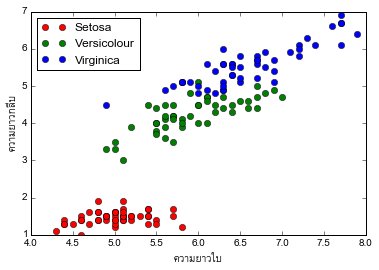

In [39]:
# plot ข้อมูล
#plt.figure(1, figsize=(7, 5))
plt.plot(X[Y==0, 0], X[Y==0, 1], 'or', label='Setosa')
plt.plot(X[Y==1, 0], X[Y==1, 1], 'og', label='Versicolour')
plt.plot(X[Y==2, 0], X[Y==2, 1], 'ob', label='Virginica')
plt.xlabel('ความยาวใบ')
plt.ylabel('ความยาวกลีบ')
plt.legend(loc='best')

จะเห็นว่าตัวอย่างดอกไม้แต่ละประเภทเกาะกลุ่มกัน แปลว่าปัญหาการจำแนกประเภทอันนี้ไม่ยากมากนัก ขอเสริมอีกหน่อย หากลองเทียบกับข้อมูลต่อไปนี้ (ข้อมูลเทียมที่สุ่มขึ้นมา)

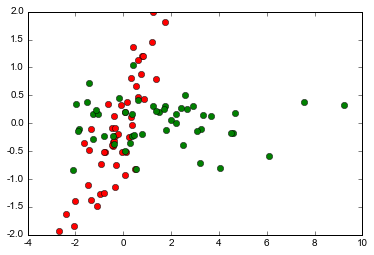

In [40]:
# สร้างข้อมูลเทียมที่ตัวอย่างจากต่างประเภทกันทับซ้อนกัน
nc = 50
cov = np.array([[1, 0.7], [0.3, 0.7]])
X_toy_0 = np.random.randn(nc, 2).dot(cov)
X_toy_1 = np.random.randn(nc, 2).dot(np.diag([2, 0.4])) + np.array([1, 0])

# plot ข้อมูลเทียม
plt.plot(X_toy_0[:, 0], X_toy_0[:, 1], 'or')
plt.plot(X_toy_1[:, 0], X_toy_1[:, 1], 'og')

ในปัญหานี้ข้อมูลของ 2 ประเภททับกัน การจำแนกประเภทจะทำได้ยากกว่า (ความผิดพลาดจะสูงกว่า) ในกรณีนี้ถ้าเป็นไปได้ก็ต้องเพิ่มตัวแปรจาก 2 มิติเป็น 3 มิติหรือมากกว่า เพื่อให้ข้อมูลต่างประเภทกันกระจายออกจากกัน ในกรณีของดอกไม้ตัวอย่างตัวแปรที่ต้องไปเก็บเพิ่มก็เช่น ความยาวลำต้น สีดอก เป็นต้น สมมติว่าเราไปเก็บตัวแปรเพิ่มมาอีก 1 ตัว แล้ว plot เป็น 3 มิติ ข้อมูลอาจจะกลายเป็นแบบนี้


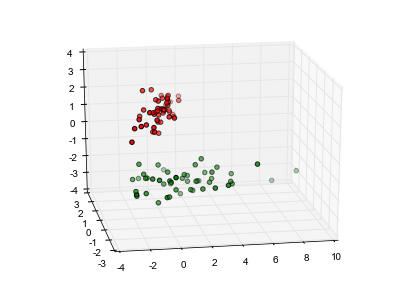

In [41]:
from mpl_toolkits.mplot3d import Axes3D 

X_toy_d3_0 = np.random.randn(nc)*0.5 + 2.0;
X_toy_d3_1 = np.random.randn(nc)*0.5 - 2.0;
# plot ข้อมูลเทียม 3 มิติ
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, -100)
ax.scatter(X_toy_0[:, 0], X_toy_0[:, 1], X_toy_d3_0, c='r')
ax.scatter(X_toy_1[:, 0], X_toy_1[:, 1], X_toy_d3_1, c='g')


ซึ่งสามารถแยกประเภทได้ง่ายกว่าข้อมูล 2 มิติ กลับเข้าปัญหาเดิมคือเรื่องแยกประเภทดอกไม้ กรณีนี้เราไม่จำเป็นต้องเก็บตัวแปรเพิ่มเติมเพราะดูจาก plot ข้อมูลไม่ได้ทับกันมาก

## KNN
K-nearest neighbours (KNN) หรือ [ขั้นตอนวิธีการค้นหาเพื่อนบ้านใกล้สุด K ตัว](https://th.wikipedia.org/wiki/%E0%B8%82%E0%B8%B1%E0%B9%89%E0%B8%99%E0%B8%95%E0%B8%AD%E0%B8%99%E0%B8%A7%E0%B8%B4%E0%B8%98%E0%B8%B5%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%84%E0%B9%89%E0%B8%99%E0%B8%AB%E0%B8%B2%E0%B9%80%E0%B8%9E%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%99%E0%B8%9A%E0%B9%89%E0%B8%B2%E0%B8%99%E0%B9%83%E0%B8%81%E0%B8%A5%E0%B9%89%E0%B8%AA%E0%B8%B8%E0%B8%94_k_%E0%B8%95%E0%B8%B1%E0%B8%A7) เป็นอัลกอริธึมจำแนกประเภทอย่างหนึ่งที่ทำงานง่ายมากตรงตามชื่อ สมมติมีตัวอย่างทดสอบใหม่เข้ามา ความยาวใบ=5.5, ความยาวกลีบ=3.1 (จุดดำ * ในภาพต่อไป) แล้วเราอยากหาว่าเป็นดอกไม้ประเภทไหน

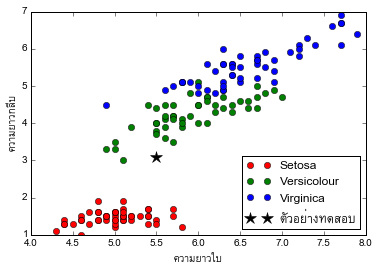

In [42]:
xte = np.array([5.5, 3.1])
plt.plot(X[Y==0, 0], X[Y==0, 1], 'or', label='Setosa')
plt.plot(X[Y==1, 0], X[Y==1, 1], 'og', label='Versicolour')
plt.plot(X[Y==2, 0], X[Y==2, 1], 'ob', label='Virginica')
plt.plot(xte[0], xte[1], '*k', label='ตัวอย่างทดสอบ', markersize=12)
plt.xlabel('ความยาวใบ')
plt.ylabel('ความยาวกลีบ')
plt.legend(loc='best')

วิธีของ KNN คือ

1. กำหนดค่า K ก่อน โดยที่ K เป็นจำนวนเพื่อนบ้านใกล้ตัวที่อยากจะพิจารณา 
2. หาตัวอย่างที่อยู่ใกล้กับจุดทดสอบที่สุดมา K ตัว
3. ดูว่าใน K ตัวอย่างนี้เป็นดอกไม้ประเภทไหนมากที่สุด จำแนกจุดทดสอบเป็นประเภทนั้น

ง่ายมาก พูดง่ายๆคือให้จุดใกล้ตัว "โหวต" ว่าควรเป็นประเภทไหนนั่นเอง จากตัวอย่างสมมติ K=1 ก็หาจุดที่ใกล้จุดทดสอบที่สุดมาหนึ่งจุด จากภาพจุดนั้นเป็นสีเขียว ก็เลยตอบว่าตัวอย่างทดสอบเป็นดอกไม้ประเภท Versicolour

## เลือก K อย่างไร

แล้ว K เท่ากับเท่าไหร่ถึงจะดีที่สุด ? วิธีหนึ่งในการเลือกค่า K ที่ดีที่สุดคือการทำ cross validation แนวคิดคือให้แบ่งข้อมูลที่ได้มาตอนแรกเป็นสองส่วน ชุดฝีกสอนกับชุดทดสอบ เลือกค่า K ที่ทำให้จำนวนตัวอย่างในชุดทดสอบถูกจำแนกผิดประเภทน้อยที่สุด เอาไว้จะอธิบายเรื่องนี้ในโอกาสหน้า ในบทความนี้คิดซะว่าเรามีค่า K ที่ใช้งานได้ดีกำหนดมาแล้ว (คิดซะว่า K=1 ก็ได้)

## ขอบเขตการตัดสินใจ

หากลองคิดดีๆจะเห็นว่าถ้าเรามีชุดฝึกสอนและค่า K แล้ว ทุกๆตำแหน่งใน plot ถูกกำหนดตายตัวแล้วว่าจะถูกจำแนกประเภทเป็นประเภทไหน เช่น เมื่อ K=1 จุดดำในภาพที่แล้วจะโดนจำแนกเป็นสีเขียว (Versicolour) ถ้าเปลี่ยนจุดทดสอบเป็นอันนี้

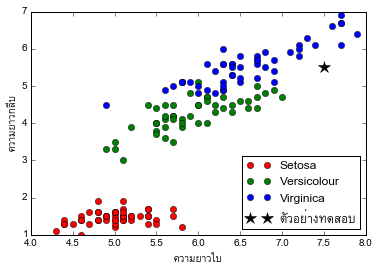

In [43]:
xte = np.array([7.5, 5.5])
plt.plot(X[Y==0, 0], X[Y==0, 1], 'or', label='Setosa')
plt.plot(X[Y==1, 0], X[Y==1, 1], 'og', label='Versicolour')
plt.plot(X[Y==2, 0], X[Y==2, 1], 'ob', label='Virginica')
plt.plot(xte[0], xte[1], '*k', label='ตัวอย่างทดสอบ', markersize=12)
plt.xlabel('ความยาวใบ')
plt.ylabel('ความยาวกลีบ')
plt.legend(loc='best')

ตัวอย่างทดสอบนี้จะถูกจำแนกเป็นสีฟ้า (Virginica) เพราะใกล้จุดสีฟ้าในชุดฝึกสอนมากที่สุด คราวนี้ลองจินตนาการว่าลองเลื่อนจุดทดสอบ (จุดดำ) นี้ไปทั่วทุกจุดที่เป็นไปได้โดยไม่เลื่อนจุดในชุดฝึกสอน ทุกๆจุดที่เลื่อนไปก็ใส่สีที่จุดทดสอบ ณ ตำแหน่งนั้นจะถูกจำแนก เราจะได้ประมาณนี้

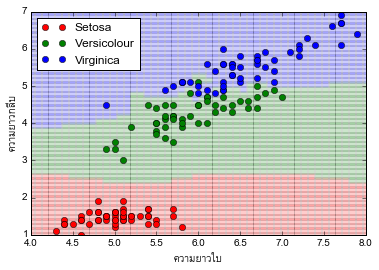

In [49]:
def classify_1nn(x, X, Y):
    x = x.reshape(1, 2)
    dists = np.sum((X - x)**2, 1)
    i = np.argmin(dists)
    return Y[i]

colours = ['r', 'g', 'b']
plt.figure()
# cox = x coordinate
for cox in np.linspace(4.0, 8.0, 50):
    for coy in np.linspace(1.0, 7.0, 50):
        xte = np.array([cox, coy])
        yhat = classify_1nn(xte, X, Y)
        plt.plot(xte[0], xte[1], colours[yhat], marker='s', markersize=6, alpha=0.2)
        
# plot training data
plt.plot(X[Y==0, 0], X[Y==0, 1], 'or', label='Setosa')
plt.plot(X[Y==1, 0], X[Y==1, 1], 'og', label='Versicolour')
plt.plot(X[Y==2, 0], X[Y==2, 1], 'ob', label='Virginica')
plt.xlabel('ความยาวใบ')
plt.ylabel('ความยาวกลีบ')
plt.legend(loc='best', framealpha=1)



ภาพที่เห็นนี้คือขอบเขตการตัดสินใจของ KNN โดยทั่วไปยิ่งค่า K มาก ขอบเขตการตัดสินใจ (decision boundary) จะ smooth คือไม่เปลี่ยนสี (ประเภทดอกไม้) กระทันหันเมื่อเลื่อนจุดทดสอบเพียงเล็กน้อย แต่ถ้าค่า K ต่ำ เช่น K=1 decision boundary อาจซับซ้อนหรือขรุขระกว่า ข้อมูลชุดนี้อาจไม่เห็นภาพมากนักกว่าค่า K น้อยมากจะเป็นอย่างไรเพราะตัวอย่างต่างประเภทแยกจากกันอยู่แล้ว

มาลองดูว่าถ้าใช้ K=1 บนข้อมูลเทียมที่เราสร้างขึ้นในตัวอย่างอันก่อนจะเป็นอย่างไร

(-1.9256314554919025, 1.9905634401529673)

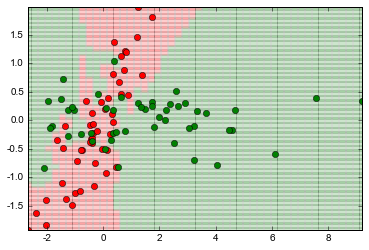

In [45]:
X_toy = np.vstack((X_toy_0, X_toy_1))
Y_toy = np.hstack((np.zeros(nc), np.ones(nc))).astype(int)

plt.figure()
xmin = np.min(X_toy[:, 0])
xmax = np.max(X_toy[:, 0])
ymin = np.min(X_toy[:, 1])
ymax = np.max(X_toy[:, 1])
# cox = x coordinate
for cox in np.linspace(xmin, xmax, 50):
    for coy in np.linspace(ymin, ymax, 50):
        xte = np.array([cox, coy])
        yhat = classify_1nn(xte, X_toy, Y_toy)
        plt.plot(xte[0], xte[1], colours[yhat], marker='s', markersize=6, alpha=0.2)
      
# plot ข้อมูลเทียม
plt.plot(X_toy_0[:, 0], X_toy_0[:, 1], 'or')
plt.plot(X_toy_1[:, 0], X_toy_1[:, 1], 'og')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])


จะเห็นว่าขอบเขตการตัดสินใจค่อนข้างขรุขระ ถ้า K มีค่ามากขึ้นจะเรียบกว่านี้ ถ้าอยากลองสร้างข้อมูลเอง 2 มิติ และกำหนดค่า K ได้ตามใจชอบลองเล่น[ได้ที่หน้านี้](http://www.openprocessing.org/sketch/98820) จะเห็นกล่องขึ้นมา ทุกๆคลิกลงบนพื้นที่จะสร้างตัวอย่างฝึกสอนขึ้นมา สามารถเปลี่ยนประเภทตัวอย่างได้โดยกด ปุ่มสีแดงหรือสีฟ้าด้านบน กด ++ จะเพิ่มค่า K หนึ่งค่า กด -- จะลดค่า K ลงหนึ่ง decision boundary จะถูกอัพเดททุกครั้งที่มีการกดปุ่ม ผมแนะนำให้ลองสร้างข้อมูลขึ้นมาตามใจชอบแล้วกด ++ หลายๆครั้ง จากนั้นกด -- หลายๆครั้งเพื่อเทียบดูว่าเปลี่ยน K แล้วขอบเขตตัดสินใจเปลี่ยนไปอย่างไร

## ข้อมูลแบบอื่น
แน่นอนว่า KNN สามารถจำแนกข้อมูลประเภทอื่นๆได้เช่นกันหากเราสามารถนำมาแปลงใส่ตารางเหมือนกับตารางข้างต้น ข้อมูลจะมีกี่ตัวแปร (มิติ หรือก็คือคอลัมน์ในตาราง) ก็ได้ สิ่งที่เราต้องใช้สำหรับ KNN คือ distance function หรือฟังก์ชันหาระยะทางระหว่างจุด 2 จุด หากมีฟังก์ชันนี้เราก็สามารถใช้ KNN ได้ จริงๆแล้วมีมากมายหลายฟังก์ชันให้เลือกใช้ ขอบเขตการตัดสินใจก็จะเปลี่ยนไปถ้าเปลี่ยนวิธีการหาระยะทาง

ยกตัวอย่างเช่น KNN สามารถใช้กับข้อมูลที่เป็นภาพได้ เช่นแต่ละตัวอย่างเป็นภาพแล้วเราต้องการจำแนกประเภทว่าเป็นภาพที่มีคนอยู่ในภาพหรือไม่มีคนอยู่ในภาพ (2 ประเภท) เป็นต้น ปัญหาคือแล้วเอามาใส่ตารางได้เหรอ? คำตอบคือได้เพราะในมุมมองของคอมพิวเตอร์ภาพก็แค่เมตริกซ์ (matrix) หรือตารางที่แต่ละช่องมีค่าบ่งบอกความเข้มของแสง แต่ละช่องในตารางก็คือหนึ่ง pixel เมตริกซ์ต่อไปนี้


In [46]:
A = (np.random.rand(4,4)*255).astype(int)
A

array([[181, 207,  83,  56],
       [ 83, 245,  24,  41],
       [177,  35,  67, 204],
       [ 76, 152, 146,  67]])

หากเปลี่ยนเป็นภาพก็จะได้

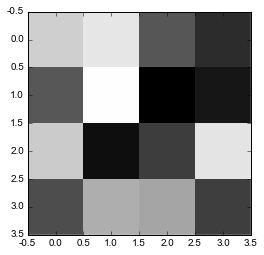

In [47]:
import matplotlib.cm as cm
plt.imshow(A, interpolation='none', cmap=cm.Greys_r)

ค่าในแต่ละช่องยิ่งมากก็ยิ่งสว่าง ถ้าจะทำให้เป็นแถวในตารางก็แค่อ่านแต่ละค่าในตารางไล่ไปตามแต่ละแถวแล้วเอาไปใส่เป็นแถวเดียวก็ได้แล้ว แบบนี้

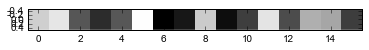

In [48]:
plt.imshow(A.reshape(1, -1), interpolation='none', cmap=cm.Greys_r)

ก็หวังว่าผู้อ่านจะเห็นภาพว่า KNN ทำงานอย่างไร มีความเห็นหรือต้องการรายละเอียดตรงไหนเชิญใส่คอมเมนต์ไว้[ที่นี่](http://datascience.in.th/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%88%E0%B8%B3%E0%B9%81%E0%B8%99%E0%B8%81%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%A0%E0%B8%97%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-knn/)

วิทวัส จิตกฤตธรรม (http://wittawat.com)